# Machine Learning Tweet Identification | Méliuz

## Incrementum Capital - BTG Experience 2021

Eduardo Dias,
Gabriel Chohfi,
Isabel Machado & 
Luís Filipe Loureiro


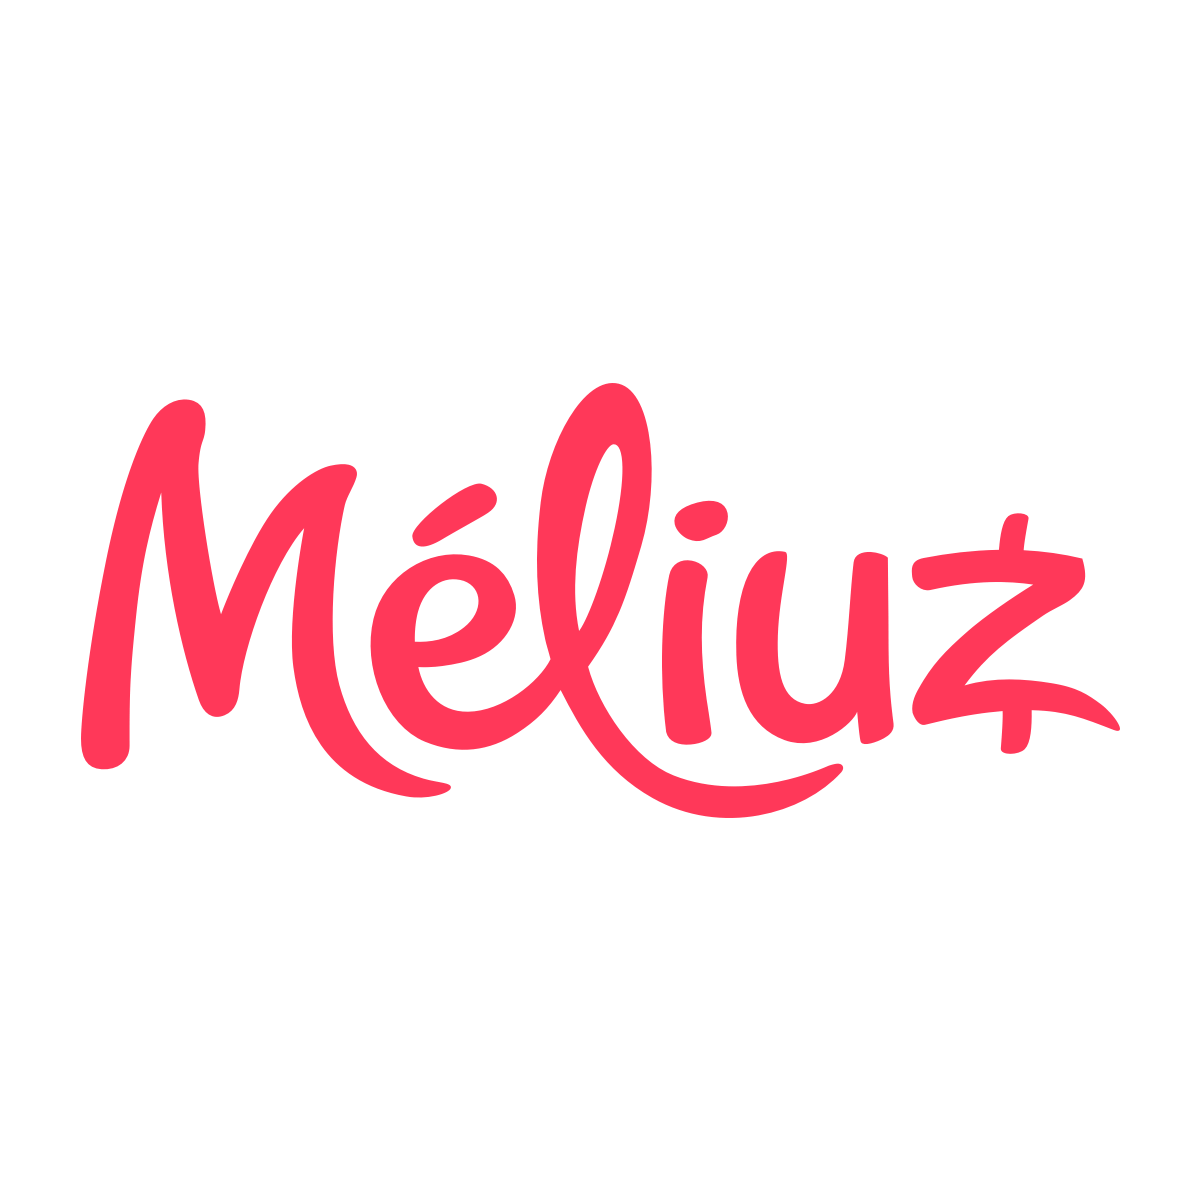

In [2]:
from IPython.display import Image
Image("imgs/Méliuz_Logo.png")

### Importando Bibliotecas

Para o Machine Learning será utilizado a biblioteca sklearn, bastante utilizada no mercado. Para tanto, foram extraídos 500 tweets para treinamento e foi aplicado em outros 1100

In [146]:
import pandas as pd
import re
import tweepy
import math
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


### Autenticação no Twitter para colher os tweets

In [ ]:
with open('auth.pass') as fp:    
    data = json.load(fp)

auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

In [ ]:
produto = 'Méliuz'
n = 1600
t = 500
lang = 'pt'

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True)
i = 1
msgs = []
for msg in tweepy.Cursor(api.search, q=produto, lang=lang, tweet_mode="extended").items():    
    msgs.append(msg.full_text.lower())
    i += 1
    if i > n:
        break
shuffle(list(set(msgs)))

In [ ]:
if not os.path.isfile('./{0}.xlsx'.format(produto)):

    writer = pd.ExcelWriter('{0}.xlsx'.format(produto))

    
    dft = pd.DataFrame({'Treinamento' : pd.Series(list(set(msgs))[:t])})
    dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

    dfc = pd.DataFrame({'Teste' : pd.Series(list(set(msgs))[t:])})
    dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

    writer.save()
print("Ok")

### Seperação daqueles tweets utilizados para treinamento e aqueles para teste

In [16]:
train = pd.read_excel('train_tweets.xlsx')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_excel('test_tweets.xlsx')
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (351, 2) 351
Test Set: (214, 2) 214


### Histograma para comparar os tamanho dos tweets utilizados no treinamento e aqueles do teste

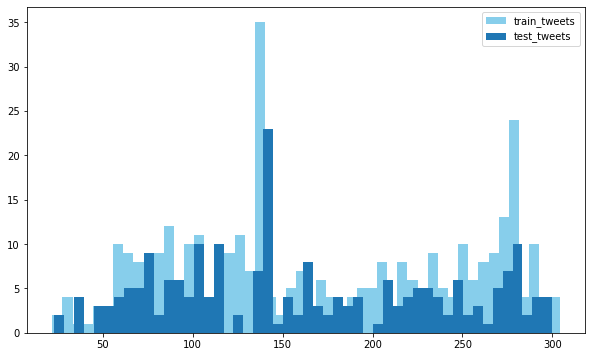

In [17]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="train_tweets",color = 'skyblue')
plt.hist(length_test, bins=50, label="test_tweets")
plt.legend()

# Term Frequency, Document Frequency | TFIDF

O Python não reconhece palavras é necessário transformar cada tweet em um vetor de números para que seja aplicado o modelo de predição

In [72]:
x = train["tweet"]
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = tfidf.fit_transform(x)
y = train["label"]
X.shape

(351, 6367)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((280, 6367), (71, 6367))

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       0.75      0.38      0.50         8

   micro avg       0.92      0.92      0.92        71
   macro avg       0.84      0.68      0.73        71
weighted avg       0.91      0.92      0.90        71



In [74]:
clf = LinearSVC()
clf.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [ ]:
y_pred = clf.predict(x_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       0.75      0.38      0.50         8

   micro avg       0.92      0.92      0.92        71
   macro avg       0.84      0.68      0.73        71
weighted avg       0.91      0.92      0.90        71



In [149]:
print("A taxa de acurácia do ML é de " + str(accuracy_score(y_test, y_pred) * 100) + " %")

A taxa de acurácia do ML é de 91.54929577464789 %


In [ ]:
score = []
for tweet in test["tweet"]:
    vec = tfidf.transform([tweet])
    score.append(int(clf.predict(vec)))

In [154]:
from collections import Counter
positive  = Counter(score)[0]/(Counter(score)[0] + Counter(score)[1]) * 100
negative = (positive - 100) * - 1
print("Por meio da biblioteca sklearn do Python o grupo desenvolveu um ML capaz de identificar tweets favoráveis")
print("e contrários ao Méliuz")
print(" ")
print("Resultado:")
print("O Méliuz apresenta " + str(positive) + "% tweets positivos")
print("O Méliuz apresenta " + str(negative) + "% tweets negativos")

Por meio da biblioteca sklearn do Python o grupo desenvolveu um ML capaz de identificar tweets favoráveis
e contrários ao Méliuz
 
Resultado:
O Méliuz apresenta 87.38317757009347% tweets positivos
O Méliuz apresenta 12.616822429906534% tweets negativos


In [156]:
positive + negative == 100

True

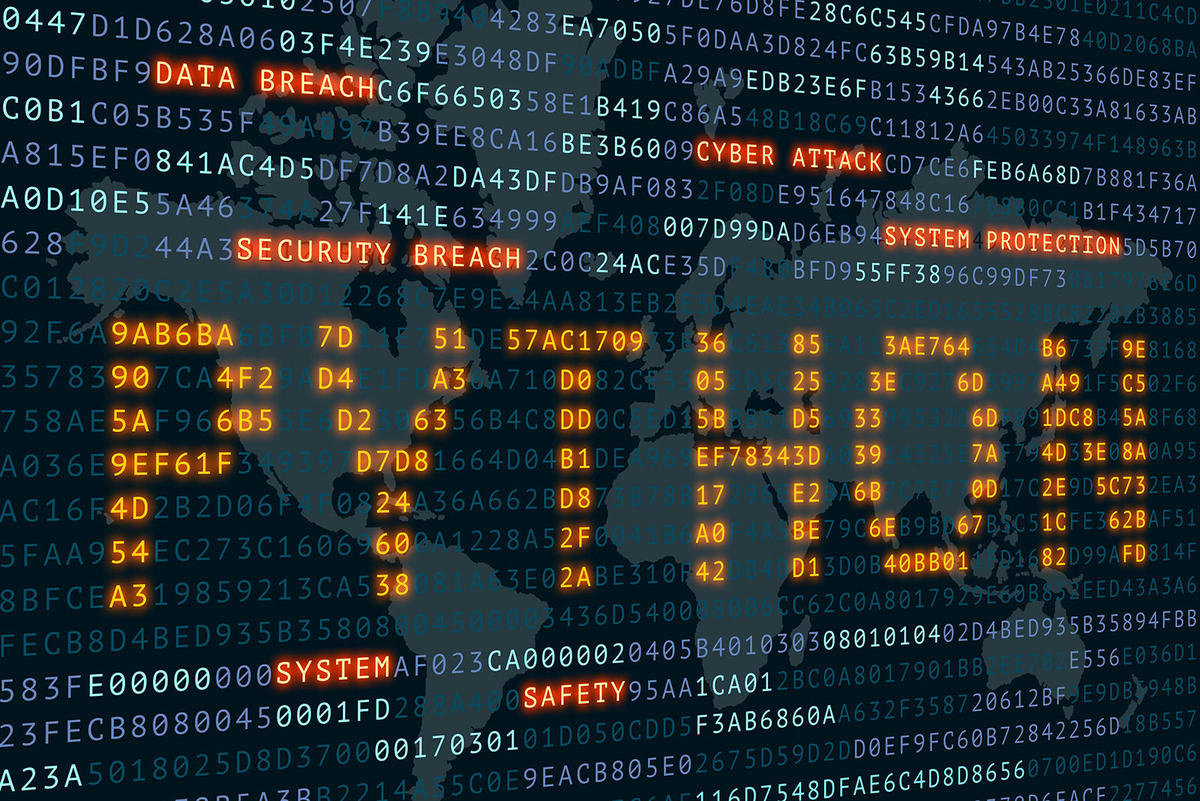

In [3]:
from IPython.display import Image
Image("imgs/ML.jpg")